<br><br><font color="gray">INTEG 440 / 640<br>MODULE 5 of *Doing Computational Social Science*</font>


# <font color="green" size=40>GETTING STARTED WITH <br>NETWORK ANALYSIS</font>

<br>

Dr. [John McLevey](http://www.johnmclevey.com)    
Department of Knowledge Integration   
Department of Sociology & Legal Studies     
University of Waterloo         

<hr>

* INTEG 440 (Undergraduate): This module is worth <font color='#437AB2'>**8%**</font> of your final grade. The questions in this module add up to 10 points. 
* INTEG 640 (Graduate): This module is worth <font color='#437AB2'>**5%**</font> of your final grade. The questions in this module add up to 10 points. 

<hr>

# Table of Contents 

* [Overview](#o)
* [Learning Outcomes](#lo) 
* [Prerequisite Knowledge](#pk) 
* [Assigned Reading](#ar) 
* [Question Links](#ql)
* [Packages Used in this Module](#packs)
* [Data Used in this Module](#data)
* [**Foundational Network Concepts**](#think)
* [**Collecting and Managing Relational Data**](#collect)
* [**Constructing Your Own Personal / Ego Network**](#pego)
* [**A Brief Introduction to Visualizing Networks and Network Properties**](#vis)
* [**Network-level Statistics**](#nlstats)
* [**Working with Large Networks**](#ln)
    * [**Edge Thresholds**](#et)
    * [**Extracting the Network Backbone**](#bb)
* [**Exporting Networks to Other Data Structures**](#exp)
* [References](#refs)

<hr>   

# Overview <a id='o'></a>

At this point in the course, we are going to switch our focus to methods for analyzing network data and then unstructured text data. 

This module introduces network analysis, with a specific focus on (1) fundamental concepts related network structure, dynamics, and effects; (2) how to construct and manage network datasets; and (3) how to get network data into `networkx` graph objects that can be used for analysis. 

<hr>

# Learning Outcomes  <a id='lo'></a>

Upon successful completion of this module, you will be able to: 

1. Define key network terminology
2. Articulate what it means to conduct networks-based research on social systems 
3. Compare similarities and differences in network theory from the social and physical sciences 
4. Construct relational datasets such as edgelists and matrices 
5. Construct `networkx` graphs from edgelists and matrices 
6. Compute and interpret simple network-level statistics 
7. Produce simple visualizations of networks and network properties (e.g. degree distribution) 

<hr>

# Prerequisite Knowledge  <a id='pk'></a>

As usual, this module assumes a basic familiarity and comfort with the building blocks of Python introduced and practiced in previous modules. 

<hr>

# Assigned Readings  <a id='ar'></a>

This module assumes you have completed the assigned readings, which are listed immediately below. The readings provide a detailed explanation of the core concepts covered in this module. 

* <font color="green">Nicholas Christakis and James Fowler. 2009. Chapter 1: "In the Thick of It." From *Connected: The Surprising Power of Our Social Networks and How They Shape Our Lives.* Little, Brown Spark.</font> 
* <font color="green">Christina Prell. 2012. Chapter 1: "Becoming Familiar with Social Networks" from *Social Network Analysis: History, Theory, & Methodology.* Sage. </font>
* <font color="green">Steve Borgatti et al.'s short (2009) article in *Science*, "[Network Analysis in the Social Sciences](http://bit.ly/borgatti)." </font>
* <font color="green">Garry Robins' (2015) "Social Systems and Data Structures: Relational Ties and Actor Attributes" from *Doing Social Network Research: Network-based Research Design for Social Scientists*. Sage. </font>
    * You can ignore references to other parts of the Robins book that are not assigned in this course. Don't feel like you need to chase down those references unless you feel you would benefit from additional knowledge about topics like network measurement. The purpose of this chapter is to introduce adjacency matrices, incidence matrices, edge lists, and node attribute files as ways of storing network data. Be sure to focus on those things as you read this chapter. 

As always, I recommend that you (1) complete the assigned readings, (2) attempt to complete this module without consulting the readings, making notes to indicate where you are uncertain, (3) go back to the readings to fill in the gaps in your knowledge, and finally (4) attempt to complete the parts of this module that you were unable to complete the first time around.

This module notebook includes highly condensed overviews of *some* of the key material from the assigned reading. This is intended as a *supplement* to the assigned reading, *not as a replacement for it*. These high-level summaries do not contain enough information for you to successfully complete the exercises that are part of this module, and they do not cover every relevant topic. 

<hr>

# Question Links <a id='ql'></a>

Make sure you have answered all of the following questions before submitting this notebook on LEARN. 

1. [Question 1](#yt1) 
2. [Question 2](#yt2) 
3. [Question 3](#yt3) 
4. [Question 4](#yt4) 
5. [Question 5](#yt5) 
6. [Question 6](#yt6) 
7. [Question 7](#yt7) 
8. [Question 8](#yt8) 
9. [Question 9](#yt9) 
10. [Question 10](#yt10) 

<hr>

# Packages Used in this Module  <a id='packs'></a> 

The cell below imports the packages that are necessary to complete this module. If there are any additional packages you wish to import, you may add them to this import cell. 

In [1]:
!pip install backbone_network
import pandas as pd 
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
import collections

import backbone_network as bb
from itertools import groupby 
from collections import Counter 

import itertools
from itertools import combinations
from ast import literal_eval
import ast

# make inline plots vector graphics instead of raster. 
%config InlineBackend.figure_format = 'svg'

# make Python quieter... 
import warnings
warnings.filterwarnings('ignore')

# Data Used in this Module  <a id='data'></a>

You will construct your own personal ego network datasets in this Module. The instructions for creating those personal networks are included below. Be sure to put the time into doing this properly, as you will work with this network in Module as well as the next two. 

### Why are we analyzing personal data in the network analysis modules?

It may seem a wee bit self-indulgent to spend so much time constructing and analyzing our own personal networks, but this is a particularly useful approach to take when learning about network analysis for the first time. You will develop much better and deeper understanding when you can really interpret and critique the results you see in front of you. You will do a much better job of that when you are analyzing a network that you know something about. Things will jump out at you and provoke questions that you would not even notice if you were only analyzing an unfamiliar network. For example, network texts often teach by using well-known datasets from classic studies. The benefit of this approach is that the community of network analysts know those networks well. However, that benefit is not realized by people who are coming to networks for the first time. 

Once you have this foundational understanding, the same concepts and methods can be applied to other network datasets. You are not limited to analyzing your own personal network. 

# Foundational Network Concepts <a id='concepts'></a>

The networks literature includes a lot of specialized language. It can be very difficult to understand network-based concepts, theories, and methods without knowing these more foundational concepts, so let's start by making sure you understand them. 

### <font color="green">YOUR TURN! (Question 1)</font> <a id='yt1'></a>

Question is Worth: <font color="green">1 point</font>

In the cell below, provide 1-2 sentence definitions of the following network analytic concepts. It is important to *use your own words*. Do not simply copy and paste definitions from the assigned reading. 

1. ego vs. whole network
2. directed vs. undirected network
3. one-mode vs. two-mode / bipartite network 
4. multi-plex networks
5. multi-level networks 
6. actor attributes 
7. contagion and network flows
8. centrality 

# Your Answer Here 

Please do not write more than 1-2 sentences per definition. 

1. ego vs. whole network
    Ego refers to singular nodes within a network and can be represented through people, organizations, or societies and can be connected to alters (ie. the nodes connected to the ego). In a holistic perspective, the whole network does not focus on a specific node, rather the entire set of actors and ties that are linked to them.
    
2. directed vs. undirected network
    Directed Networks include ties, via arrowheads, that dictate the direction from one node to another going one way or the other way or both ways. Undirected networks do not include directionality within edges implying one node to another can go both ways if connected by an edge. 
    
3. one-mode vs. two-mode / bipartite network 
   One-mode networks are ones for which a single relation is studied in the network of actors and their ties for which a good example can be friendship. Based on two distinct separate entries within the matrix, two-mode networks are related to actors being tied to particlar events.

4. multi-plex networks
There are multiple unique ties between nodes within this network but each relational tie can be explained via an adjacency matrix. 

5. multi-level networks 
These networks are specific in the sense their composition consists of two types of nodes and three types of ties. 

6. actor attributes 
Refers to the unique and distinct characteristics/measures that describe the actors such as demographic, physical attributes, social behaviour, orientation, etc.

7. contagion and network flows
Contagion refers to the flows within the ties of the network itself. Good examples of these can be buckets of water, money, data flow. 

8. centrality  
Centrality is the measure of connectedness a node has within the network itself. Interconnected is an indication of higher cenrality than simply being on the edge of the network where you are more "closed off". In general terms, the structural important and prominence of a node within a network. 

### <font color="green">YOUR TURN! (Question 2)</font> <a id='yt2'></a>

Question is Worth: <font color="green">2 points</font>

Christakis and Fowler outline five "rules of life in the network" in the assigned reading from their book *Connected*. They are the following:  

1. We shape our network
2. Our network shapes us 
3. Our friends affect us 
4. Our friends' friends' friends affect us 
5. The network has a life of its own 

In the cell below, briefly explain what each of these "rules of life in the network" mean. 

# Your Answer Here 

Please do not write more than 2-3 sentences per rule.

1. We shape our network
Humans dictate the network they create. We are able to dictate the number of connections, the density of our interconnections and how central we are to our social network. 
2. Our network shapes us
Our placing within the network will ultimately affect us in the sense of whether people in our network talk to each other (a more transitive) manner and what social implications can be created due to the circumstances within the network (orphan child). Additionally, depending on how we present ourselves within a network, we can shape it to be more centralized or decentralized. 
3. Our friends affect us 
Friends that are close to us can influence us in relation to the network and what we choose to analyze. These influences lead to consequences and causes 
4. Our friends' freiends' friends affect us 
Similar to aforementioned rule, even friends of our friends can play a large influence on us coming through the pipeline of connection. Dependent on the subject of matter, this hyperdyadic spread is dependent on the structure of the social network and the point of analysis. 
5. The network has a life of its own 
Within a network, decisions are not reflective of the individual within the structure of the network but the network itself in a hollistic perspective. The network itself contains emergent properties that can not be understood at a granular level. 

### <font color="green">YOUR TURN! (Question 3)</font> <a id='yt3'></a>

Question is Worth: <font color="green">1 point</font>

The interdisciplinary world of network science includes social scientists (especially sociologists and political scientists), physical scientists, health scientists, computer scientists, mathematicians, and many others. One consequence of this interdisciplinarity is that people with different scientific backgrounds do not always agree on what "theory" is. In the cell below, characterize some of the main differences between network theory in the social and physical sciences. Are they compatible? If so, how? If not, why not? 

(Hint: consult the assigned Borgatti et al. article.)

In the assigned Borgatti et al. article, there is a lot of detailed talk about the differences between network theory in the social and physical sciences in due to part to the:
>1. Types of ties
>2. The importance of structure
>3. Research Questions
>4. Theoretical mechanisms

Any dyadic property within the network is usually not considered within the realm of the physical sciences but is heavily analyzed within social sciences since they inform insights on the outcomes of pertaining nodes and their surroundings. In physical sciences, they're both network and graph are seen as synonymous which qualifies for the same types of mathematical techniques to be applied for both. In terms of research, both sciences have shown compatability in the sense that they common goal towards explaining how network ties are formed and subsequently the properties of said network. In the social sciences, the research here is relative to the ties and points of interaction towards relative outcomes and how that can be interesting. For each science, one sees the other as descriptive in the sense that there is no relative depth to with analysis is done. This is due to the general distinction in goals between the two sciences since physical sciences aim to show development of properties within networks in relation to pre-established results whereas social sciences considers the differences in networks to be large contributing factors to the differences in the outcomes. Moreover, the outcomes of these networks is a sure fire since the properties of the network vary for which social scientists pay close attention to invidivual nodes whereas physical sciences wouldn't as much. It is a difference between theoretical and descriptive work which innately separates the two sciences. 

# Collecting and Managing Relational Data <a id='collect'></a> 

Generally speaking, network data is stored in matrices that indicate the presence / absence or weight of a tie between two nodes of the same type (i.e. an **adjacency matrix**), or between nodes of one type and nodes of another type (i.e. **incidence matrix**). The latter is commonly used to store two-mode network data, such as people $x$ organizational affiliations of people $x$ events attended. Two-mode incidence matrices can be "projected" into two one-mode adjacency matrices (e.g. people linked by co-affiliations, organizations linked by common members; people linked by co-presence at the same events, events linked by common participants). 

Matrices are everywhere in network analysis, but as you now know they are not the only way to store and share network data. Other formats, such as weighted edgelists and node attribute files may be better options in some cases. As Garry Robins argues in his chapter on network data structures, decisions about how to store your network data should be grounded in larger considerations of your research questions and general research design. That said, you can always convert between data structures once your network has been created. 

### <font color="green">YOUR TURN! (Question 4)</font> <a id='yt4'></a>

Question is Worth: <font color="green">.5 points</font>

In the cell below, (1) describe what a weighted edge list looks like, (2) describe what a node attribute file looks like, and (3) compare the possible pros and cons of storing network data in the form of edgelists and attribute files vs. matrices. 

#### Weighted Edge List
Essentially a network in which the edges have respective weights between the nodes they are connected to. This network can be respresented through an adjacency list where numbers within the list corresponds to weight of the edge between row (node 1) and columnn (node 2).    

#### Node Attribute File
Is a file that contains attributes of the actors within the network. Within this file, nodes are not repeated and attributes are unique to the node. These are relative to the node themselves and help to explain key attributes. 
https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

#### Pros and Cons of Storing Network Data in the form of edgelists and attribute files vs matrices
edgelists and attribute files pros
- modularity and larger context hold for nodes within separate files 
cons
- requires mapping to be done between each file 

## Constructing Your Own Personal / Ego Network <a id='pego'></a>

To make the content on network data structures a bit more concrete, we are going to do a short exercise where you enter data on your own personal networks directly into an adjacency matrix. Once you are finished entering the data, you will have to load it into Python and create a `networkx` network object from it. **Note that normally you would *not* enter network data directly into a matrix**. We are doing so here because the networks we are talking about are relatively small and the goal is to better understand how we can work with data in the form of an adjacency matrix. 

To complete this short assignment -- and to get credit for the questions below -- you will need to create a new spreadsheet using an application of your choice, such as Sheets (Google), Numbers (Apple), Excel (Microsoft), or Open Office (Apache). You will enter the data into this spreadsheet and then save it or export it as a `.csv` file. 

We are going to enter names into the first column of your spreadsheet, starting with the second cell in the first column (A2). We will leave the first cell in the column (A1) empty. Start by entering your own name in cell A2. After that, move your cursor to cell A3 (where you will enter the next name). 

There are a set of 5 questions below, most of which were adapted from a set of questions in the assigned chapter by Christina Prell. Each question will prompt you to think of people that you know. When you think of someone in response to one of these questions, you should enter their name into a new cell in Column A of the spreadsheet. It is very likely that the same person will come to mind as an answer to multiple questions. That's fine (and to be expected!), but **do not repeat names.** If a name comes to mind in response to question 3 but that person is already in your list of names because you thought of them in response to question 1, do not record their name a second time. It is normal to have fewer new names to add as you answer each question. 

1. In the last 3 months, whom have you interacted with most frequently? Be sure to think about both online and offline relationships, but *do not include more than the top 10 people*. The more people you include, the longer and more cognitively demanding this exercise will be. 
2. Who is in your immediate family? 
3. Who do you tend to socialize with? 
4. Whom do your turn to for advice in making important decisions about your professional career?
5. Whom do you turn to for emotional support when you experience personal problems? 

By the way, these are just some examples of the types of questions you can ask to collect network data. In real research, you should develop your questions very carefully so that the network data you collect is well-suited to your research questions. 

To make this a little less abstract, the figure below shows my answers to each of these questions. In the end, I had a little over 60 unique names, shown as first name and last initial in Column A. In my case, the names refer to people who are in my immediate family (e.g. my three siblings), close friends in various cities / countries and from various different phases of my life, a few students (who I am supervising or who work for me), and professional colleagues and research collaborators. I also added the names of some of my professors from grad school who had a significant influence on me in one way or another and with whom I am still in touch with. I made a decision not to include the names of students in my classes, with whom I might only interact with in the context of a class. 

![](img/ego_1.png)

When you have finished entering names, select / highlight all the names you entered and copy them (`command` + `c` for Mac, `control` + `c` for Linux and Windows). Make sure you also copy the empty cell A1. 

Next, right click on the empty cell A1 and select "Paste Special" > "Paste Transposed." Once again, the image below shows what this should look like on your computer. 

![](img/ego_2.png)

The result will be that all names are now entered horizontally across the columns. We are now ready to enter relational data into this adjacency matrix. 

Each cell in this matrix represents a relationship between a person whose name is in Column A and a person whose name is in Row 1. The diagonal represents relationships between the same entities, such as John M to John M, Ally S to Ally S, and Megan H to Megan H. We are not interested in these relationships, so we will start by entering a 9 into each of these cells. The relationships above and below the matrix diagonal are identical in this particular network dataset, so we will only enter data on relationships below the diagonal. To make this easier, you should "freeze" the first row and the first column so that you will always be able to see names as you enter data into your spreadsheet.

Heads up: this can be a bit tedious. If you work your way down one column at a time, it gets easier as you go since you have to think about fewer relationships for each column. 

Recall that the purpose of this exercise is to become familiar with common network data structures, not to produce the best possible representation of your personal network. Therefore, to simplify things, we will only record binary data -- do these two people have a relationship with one another or not? If they do (to the best of your knowledge, anyway), record a 1 in the appropriate cell. If not, leave the cell empty. (Alternatively, you could record a 0, as Garry Robins suggests in the assigned reading.) In some cases, you will have to make a decision about how to handle ambiguous relationships. For example, in 2010 my PhD supervisor made a trip to my home town and met people in my immediate family and some of my closest friends. He has not seen or talked to many of them since, although he knows who they are and they know who he is. Should I assign a relationship between them in the spreadsheet? I decided not to, since they would be relatively unlikely to strike up a conversation without me, and likely would not recognize one another is they crossed paths in person. Once again, this is a situation where the decision you make should be guided by the question you are trying to answer. 

*I will leave it to you to define what a relationship is in this context.* It doesn't matter if you use the same definition as I do, because we are not comparing networks. However, it is essential that you use the same definition for everyone in your dataset. Perhaps you set a high bar, such as friendship. Perhaps you set a low bar, such as whether or not the two people have met face-to-face at least once. This is your personal network, so the choice is yours. 

Here's a screenshot of part of my own data (obviously many columns are not shown) to illustrate what this will look like as you enter your own data. 

![](img/ego_3.png)

You may notice that parts of my matrix are fairly sparse. That's normal, and your data will *probably* look similar. However, there is a good chance that your data will be less sparse than mine because, at this point in my life, I develop and maintain a lot of different types of relationships, and many of my relationships are strongly shaped by geography. For example, most of my closest friends from grad school and from when I lived in Toronto don't know my friends from [the city I grew up in](https://www.google.com/search?q=st+john%27s+nl&client=safari&rls=en&sxsrf=ACYBGNTATa9qwpyn15yy5r5LTfF6DY0M_Q:1576529783939&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiahP-Nh7vmAhUL0FkKHZlaBnEQ_AUoAnoECBMQBA&biw=1265&bih=1334). My colleagues at the University of Waterloo don't really know my research collaborators in Germany, the UK, the US, or Australia. My partner knows most of the people in my personal network, but not necessarily the students who I hire into TA positions, the Executive Director of the research institute at Cardiff University that I work with, or the colleagues that I like to hike with before / after conferences in my field. If your relationships also tend to be more or less clustered around certain aspects of your life -- work, family, friends, etc. -- or distributed across different cities, provinces, and countries -- then your network data will have sparse regions like mine, because these people are less likely to meet one another. 

Now that you have finished entering the data, save or download your spreadsheet **as a .csv file.**  

![](img/ego_4.png)

Then upload it to the `data` folder on the UW server you are running this notebook in.

![](img/ego_5.png)

In case it helps clarify things further, you can access my ego network data by loading up the file `jm_ego_data.csv` from the `data` directory. You may want to download the `.csv` file to your own computer and open it up with whatever program you use to work with spreadsheets. 

### <font color="green">YOUR TURN! (Question 5)</font> <a id='yt5'></a>

Question is Worth: <font color="green">.5 points</font>

Change the code in the cell below so that it reads in the `csv` file containing **your** personal ego network data. You will know it worked if you it does now throw and error and you see descriptive network statistics that differ from mine. 

In [4]:
# Your Answer Here 

df = pd.read_csv('data/ps_ego_data.csv', index_col=0)

# replace any cell values that are not numbers with 0
df.replace(regex=r'\D', value=0, inplace=True) 
# replace missing data (nan) with 0
df.fillna(0, inplace=True)
# strip white space from the names in Col 1 and Row 1
df.index = df.index.str.strip() 
df.columns = [c.strip() for c in df.columns]
# zero out the diagonal to remove self-loops (coded as 9 during data entry)
for i in df.index:
    df.loc[i,i] = 0
# construct a networkx object from the adjacency matrix
G = nx.from_pandas_adjacency(df)
G.name = 'Personal Network'

We can get some simple descriptive information about our personal network by using the `info()` function, which takes a graph object as an argument. It returns the number of nodes and edges in the graph, as well as the average degree. 

In [5]:
print(nx.info(G))

Name: Personal Network
Type: Graph
Number of nodes: 52
Number of edges: 217
Average degree:   8.3462


As you will learn in the next several modules, it is possible to systematically add and delete nodes and edges from a `networkx` network. In this case, we may want to remove ourselves from our own ego network to more clearly see how the people in our lives are connected to each other *aside from* the relationships they have with us directly. We can do this using the `remove_node()` method. 

Change the name `John M` below to your own to remove yourself from your personal network data (or leave my name if you are analyzing my network). Remember to use the same name you used for yourself when you entered the data in the first place. 

In [6]:
G_no_ego = G.copy()
G_no_ego.remove_node('Pavneet Singh')

Once you remove yourself from your network, you will see a change in the number of nodes and edges, as well as descriptive statistics such as average degree. 

In [7]:
print(nx.info(G_no_ego))

Name: Personal Network
Type: Graph
Number of nodes: 51
Number of edges: 166
Average degree:   6.5098


We can also get simple descriptive network statistics, such as the number of nodes with the `.number_of_nodes()` method and the number of edges with the `number_of_edges()`, using `networkx` methods. These are methods for a `networkx` graph object, not general `networkx` functions that take graphs as arguments. 

In [8]:
G_no_ego.number_of_nodes()

51

In [9]:
G_no_ego.number_of_edges()

166

We will consider other types of descriptive network statistics below, in the section "[Network-level Statistics](#nlstats)."

# A Brief Introduction to Visualizing Networks and Network Properties <a id='vis'></a>

If the network is not too large and dense, we can create an initial exploratory visualization of the network. We can do this using the `draw()` function. 

Determining where to position nodes is more complex than you might initially think. There are now a fairly broad range of layout algorithms to determine where each node should be placed relative to the other nodes in the network. We are using to use a popular spring layout algorithm, but there are others available in `networkx` that you may wish to consider. Other network analysis software with an emphasis on visualization (e.g. Gephi, Visone, Pajek) have additional layout algorithms. 

First, we will compute the $x$ and $y$ coordinates for each node in the network using the `spring_layout` function.

In [10]:
pos = nx.spring_layout(G_no_ego, iterations=500, seed = 23)

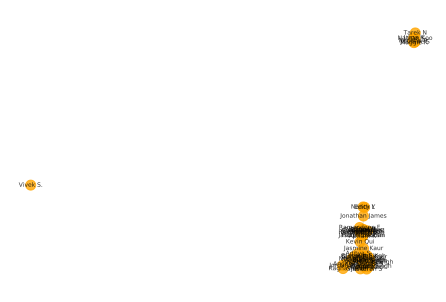

In [11]:
nx.draw(G_no_ego, # the network you want to plot
        pos = pos, # the x y coordinates for each node 
        with_labels = True, # whether or not to print the node labels 
        node_color = 'orange', # what color to make the nodes
        font_color = 'black', # what color to make the font for the labels 
        edge_color = 'lightgray', # what color to make the edges 
        font_size = 6, # what size to make the font 
        alpha = .8, # how much transparency to use in when plotting the nodes 
        node_size = 100) # how big to make the nodes 

Although `networkx` is capable of producing network visualizations, it is a secondary concern. In my experience, however, it is possible to produce informative network visualizations using `networkx` if you are willing to invest a little time and care. I personally prefer to spend a bit of time customizing the network plots in Python even if the plots are slightly less beautiful than those that might be produced out of the box using other software. That preference is rooted in my more general belief that *all* consequential research decisions in a computational social science research project should be scripted *if at all possible*. I encourage you to adopt that same practice, but will leave further discussion about reproducibility and transparency until the final module of the course. 

`networkx` visualizations are highly customizable. For example, let's say you wanted to change the labels on the plot so that they use first and last initials rather than first name last initial. We could write a function to get the initials from the original node labels and return a dictionary that can be passed as an argument to the `draw()` function. For example: 

In [12]:
def get_initials(network):
    labeldict = {}
    for node in network.nodes(): 
        sep = node.split()
        first = sep[0][0]
        last = sep[-1]
        labeldict[node] = first + last
    return labeldict
    
labs = get_initials(G_no_ego)
labs

{'Jasdip Chauhan': 'JChauhan',
 'Jasmine Kaur': 'JKaur',
 'Gagan Kaur': 'GKaur',
 'Satnam Singh': 'SSingh',
 'Ajit Singh': 'ASingh',
 'Vickramjit Singh': 'VSingh',
 'Jasjit Singh': 'JSingh',
 'Arvinder Singh': 'ASingh',
 'Jivanpal S': 'JS',
 'Kevin Qui': 'KQui',
 'Gurmeet Singh': 'GSingh',
 'Gurvinder Kaur': 'GKaur',
 'Gulshan Kaur': 'GKaur',
 'Sushant Pruthi': 'SPruthi',
 'Emad Ahmed': 'EAhmed',
 'Harsh Chokshi': 'HChokshi',
 'Tilak G': 'TG',
 'Shreya S': 'SS',
 'Revanth Sakthi': 'RSakthi',
 'Vivek S.': 'VS.',
 'Angela L': 'AL',
 'Raghav G': 'RG',
 'Jordan M': 'JM',
 'Simon P': 'SP',
 'Daniel H': 'DH',
 'Nick A': 'NA',
 'Nathan Koo': 'NKoo',
 'Damon Chau': 'DChau',
 'Jeffrey W': 'JW',
 'Kiran K': 'KK',
 'Prnaam K': 'PK',
 'Darren S': 'DS',
 'Nancy Y': 'NY',
 'Edith L': 'EL',
 'Gagan S': 'GS',
 'Jaskaran S': 'JS',
 'Jora S': 'JS',
 'Sharan R': 'SR',
 'Ramandeep F': 'RF',
 'Nedim H': 'NH',
 'Aditya S': 'AS',
 'Vishaal C': 'VC',
 'Apiram K': 'AK',
 'Dilraj S': 'DS',
 'Luna K': 'LK',
 'Ma

We can now use the `labs` dictionary in our network visualization. 

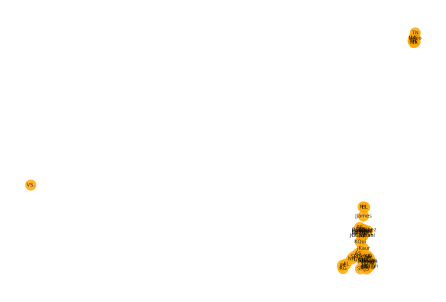

In [13]:
nx.draw(G_no_ego, # the network you want to plot
        pos = pos, # the x y coordinates for each node 
        with_labels = True, # whether or not to print the node labels 
        labels = labs, # our dictionary of custom labels 
        node_color = 'orange', # what color to make the nodes
        font_color = 'black', # what color to make the font for the labels 
        edge_color = 'lightgray', # what color to make the edges 
        font_size = 5, # what size to make the font 
        alpha = .8, # how much transparency to use in when plotting the nodes 
        node_size = 100) # how big to make the nodes 

The plot above is cleaner than our original because every node is represented by two initials rather than strings that vary in length. However, we can still do more work to improve the visualization. For example, in my ego network, there are two people with the initials `SG` -- Sasha Graham and Sam Garnett. To fix this problem, I could modify my `get_initials()` function to take the first two letters from a person's first or last name. Since the second letter of both names is a, using last name might be more informative, resulting in `SGr` and `SGa`. If you do not have this problem in your network, you may simply stick to first and last initials. 

### <font color="green">YOUR TURN! (Question 6)</font> <a id='yt6'></a>

Question is Worth: <font color="green">1 point</font>
    
In the cell below, modify the `get_initials()` function so that it returns the first three letters of the person's last name. Make all three letters uppercase by using Python's `.upper()` method for strings. 

In [14]:
# Your Answer Here

# modify the function below to produce the requested labels 
def get_initials(network):
    labeldict = {}
    for node in network.nodes(): 
        sep = node.split()
        first = sep[0][0]
        last = sep[-1][:3].upper()
        labeldict[node] = first + last
    return labeldict
    
revised_labs = get_initials(G_no_ego)
revised_labs # check to see if the values of the dict are the three letters you were expecting to see. 

{'Jasdip Chauhan': 'JCHA',
 'Jasmine Kaur': 'JKAU',
 'Gagan Kaur': 'GKAU',
 'Satnam Singh': 'SSIN',
 'Ajit Singh': 'ASIN',
 'Vickramjit Singh': 'VSIN',
 'Jasjit Singh': 'JSIN',
 'Arvinder Singh': 'ASIN',
 'Jivanpal S': 'JS',
 'Kevin Qui': 'KQUI',
 'Gurmeet Singh': 'GSIN',
 'Gurvinder Kaur': 'GKAU',
 'Gulshan Kaur': 'GKAU',
 'Sushant Pruthi': 'SPRU',
 'Emad Ahmed': 'EAHM',
 'Harsh Chokshi': 'HCHO',
 'Tilak G': 'TG',
 'Shreya S': 'SS',
 'Revanth Sakthi': 'RSAK',
 'Vivek S.': 'VS.',
 'Angela L': 'AL',
 'Raghav G': 'RG',
 'Jordan M': 'JM',
 'Simon P': 'SP',
 'Daniel H': 'DH',
 'Nick A': 'NA',
 'Nathan Koo': 'NKOO',
 'Damon Chau': 'DCHA',
 'Jeffrey W': 'JW',
 'Kiran K': 'KK',
 'Prnaam K': 'PK',
 'Darren S': 'DS',
 'Nancy Y': 'NY',
 'Edith L': 'EL',
 'Gagan S': 'GS',
 'Jaskaran S': 'JS',
 'Jora S': 'JS',
 'Sharan R': 'SR',
 'Ramandeep F': 'RF',
 'Nedim H': 'NH',
 'Aditya S': 'AS',
 'Vishaal C': 'VC',
 'Apiram K': 'AK',
 'Dilraj S': 'DS',
 'Luna K': 'LK',
 'Maggie K': 'MK',
 'Jasmine S': 'JS'

Let's use these new labels in another visualization. If the code below throws an error, you will need to debug your revised `get_initials()` function. 

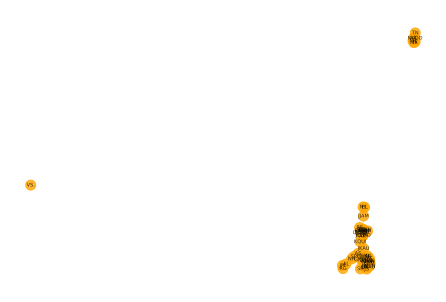

In [15]:
nx.draw(G_no_ego, # the network you want to plot
        pos = pos, # the x y coordinates for each node 
        with_labels = True, # whether or not to print the node labels 
        labels = revised_labs, # our dictionary of custom labels 
        node_color = 'orange', # what color to make the nodes
        font_color = 'black', # what color to make the font for the labels 
        edge_color = 'lightgray', # what color to make the edges 
        font_size = 5, # what size to make the font 
        alpha = .8, # how much transparency to use in when plotting the nodes 
        node_size = 100) # how big to make the nodes 

There are other modifications we might make to this network visualization, such as changing the size of the nodes to represent some important quantitative property, such as node degree centrality. This can be done with just a little additional work. For example, we could compute degree centrality for each node and save it in a `dictionary` called `deg`. 

It would be nice if we could just use the normalized degree scores as values for node size, but this won't work because the degree scores are normalized. As you can see from the code below, all scores are between 0 and 1. 

In [16]:
nx.degree_centrality(G_no_ego)

{'Jasdip Chauhan': 0.3,
 'Jasmine Kaur': 0.22,
 'Gagan Kaur': 0.08,
 'Satnam Singh': 0.32,
 'Ajit Singh': 0.3,
 'Vickramjit Singh': 0.14,
 'Jasjit Singh': 0.14,
 'Arvinder Singh': 0.06,
 'Jivanpal S': 0.06,
 'Kevin Qui': 0.08,
 'Gurmeet Singh': 0.1,
 'Gurvinder Kaur': 0.12,
 'Gulshan Kaur': 0.06,
 'Sushant Pruthi': 0.3,
 'Emad Ahmed': 0.24,
 'Harsh Chokshi': 0.3,
 'Tilak G': 0.24,
 'Shreya S': 0.22,
 'Revanth Sakthi': 0.22,
 'Vivek S.': 0.0,
 'Angela L': 0.06,
 'Raghav G': 0.04,
 'Jordan M': 0.04,
 'Simon P': 0.04,
 'Daniel H': 0.22,
 'Nick A': 0.02,
 'Nathan Koo': 0.1,
 'Damon Chau': 0.16,
 'Jeffrey W': 0.24,
 'Kiran K': 0.12,
 'Prnaam K': 0.1,
 'Darren S': 0.08,
 'Nancy Y': 0.04,
 'Edith L': 0.04,
 'Gagan S': 0.1,
 'Jaskaran S': 0.08,
 'Jora S': 0.12,
 'Sharan R': 0.02,
 'Ramandeep F': 0.06,
 'Nedim H': 0.06,
 'Aditya S': 0.1,
 'Vishaal C': 0.24,
 'Apiram K': 0.24,
 'Dilraj S': 0.22,
 'Luna K': 0.1,
 'Maggie K': 0.08,
 'Jasmine S': 0.08,
 'Nerisha R': 0.08,
 'Tarek N': 0.04,
 'Jonath

These numbers are too small to be used as node sizes, so we need to perform some operation on the degree scores that will result in a list of node sizes that are reasonable for visualization. However, we can't just add a baseline number (e.g. degree + 50) to the scores because the differences in node sizes will be far to small to notice. The difference between a high degree node and a low degree node will be less than 1, which is far too small to pick out in a visualization. Instead, we want to multiply the degree scores by some value (e.g. 500) and then add a baseline number (e.g. 25) to ensure that no nodes are smaller than that baseline number. I selected the numbers 500 and 25 after a few iterations. You should feel free to experiment with these numbers too and see what the effects are on the visualization. 

In [17]:
deg = nx.degree_centrality(G_no_ego)
sizes = [n * 500 + 25 for n in deg.values()]

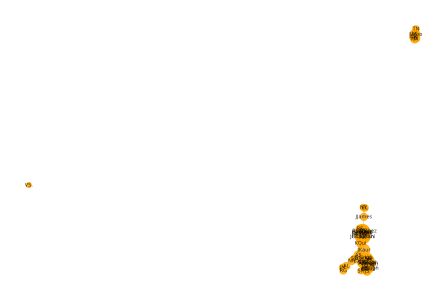

In [18]:
nx.draw(G_no_ego, # the network you want to plot
        pos = pos, # the x y coordinates for each node 
        with_labels = True, # whether or not to print the node labels 
        labels = labs, # our dictionary of custom labels 
        node_color = 'orange', # what color to make the nodes
        font_color = 'black', # what color to make the font for the labels 
        edge_color = 'lightgray', # what color to make the edges 
        font_size = 5, # what size to make the font 
        alpha = .8, # how much transparency to use in when plotting the nodes 
        node_size = sizes) # how big to make the nodes 

# let's save images of our final visualizations 
plt.savefig('img/personal_network.pdf') # save our visualization as a PDF file -- vector graphics
plt.savefig('img/personal_network.png', dpi = 600) # save our visualization as a high resolution PNG file -- raster graphics 

There are of course many other modifications we can make to this network, such as changing the width and style of the edges based on edge attributes (e.g. edge weight, which we did not record for this exercise), or changing the color of nodes based on some node attribute (e.g. disclosed gender identity). We will set further customization of the visualization aside for now, however.

### <font color="green">YOUR TURN! (Question 7)</font> <a id='yt7'></a>

Question is Worth: <font color="green">1 point</font>

The cells above create visualizations of the network. Each time you produce these visualizations, the outcome is slightly different *unless you set a random seed*. Use the cell below to explain, in general terms, why the network looks different each time. Given this, what, if anything, can we learn from classic visualizations such as these ones? 

To generate reproducible plots there needs to be a random seed passed to each networkx call in order to ensure the plot is the same. In our case, the networkx does not hold a context. Since spring layout does not have context of sch random seed, the position of nodes are always started from a random initial condition. So when each time `spring_layout` is called, the position will be generated to be different initially due to the random generation. In totality, it would be wise to consider that certain attributes or properties of the network relative to position and layout should be carefully considered (analyze code first) in order to assess the viability and reproducibility of such grah. For these visualizations, they help to rather inform the general construction of the network and how the interaction occurs within the network from a dyadic perspective rather than physical and low-level viewpoint. 

## Visualizing Degree Distributions

Generally speaking, the networks that computational social scientists analyze are too large and dense for a quick visualization like this to be informative. However, there are other visualizations of network properties that are (sometimes) more informative, and which scale easily to large networks. For example, we can plot the degree distribution (remember that degree is simply a count of the number of alters a node has). To do so, we will count the number of nodes with degree 0, 1, 2, 3, etc. We will do so using the `Counter()` method from the `collections` package. 

Note that we are using *raw* degree counts here, not normalized degree centrality. In other words, the degree scores are not normalized. If a node is connected to 23 other nodes, she will have a degree of 23. Most of the time you will want to use normalized scores, but in cases like this it can be helpful to use the raw count values. 

In [20]:
degree_sequence = sorted([d for n, d in G_no_ego.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
d, cnt = zip(*degreeCount.items())

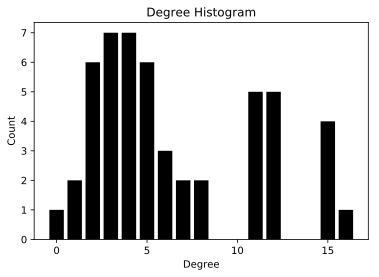

In [21]:
plt.bar(d, cnt, width=0.80, color='black')
plt.xticks(np.arange(0, max(d)+2, step=5)) 
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

### <font color="green">YOUR TURN! (Question 8)</font> <a id='yt8'></a>

Question is Worth: <font color="green">1 point</font>

Although we have yet covered centrality scores in detail, we have already encountered the basic idea of node degree. In the cell below, interpret the degree histogram for your own personal network. What does the distribution look like? Does there appear to be inequalities in how connected the people in your personal network are? 

There seems to be inequalities within the degree distribution with a large number of nodes (15 people or so) within the networks having degree of connection greater than 10. This implies that there are some highly central individuals within the network which would be most of my program friends. These also include some of my best friends outside of school who are connected to other distinct separate mutuals. Since they are connected to one another already, the removal of the ego within the network would still keep them centralized as they are all closely tied to one another. Below the 10 degree of connection lies a normal like distribution with a large average of people having 4-5 degrees of connection which implies there could be structural holes within the network (which is seen through the visualization. These could be people from my club or people I've met on trips, since for most part they aren't central to many alters but a select few mutuals. For a large part, the relative majority within the network is not heavily connected to many altars but there are numerous individuals who are connected far and wide. T

Some networks are characterized by fairly extremely inequalities in how connected nodes are. In some networks, this is hypothesized to be the outcome of "preferential attachment," otherwise known as "the Matthew effect" or "cumulative advantage." If there is a lot of inequality of this kind, then it can be helpful to plot the degree distribution with both axes on a log scale. This can help reveal a power law distribution, which would resemble a relatively straight negative line from the upper right to the bottom left. 

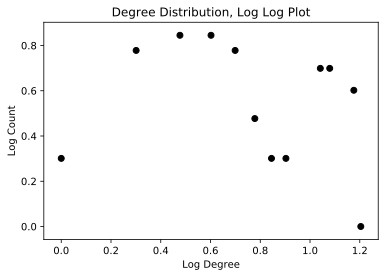

In [24]:
plt.scatter(np.log10(d), np.log10(cnt), color='black')
plt.title("Degree Distribution, Log Log Plot")
plt.ylabel("Log Count")
plt.xlabel("Log Degree")
plt.show()

If it is important to formally check for a power law distribution in your network, then there are sophisticated methods for doing so (e.g. the `powerlaw` package). However, most of the time it is not *that* important to know if your degree distribution is *exactly* a power law distribution or simply that there is a fair amount of inequality in the extent to which nodes are connected. 

<!--
SOME POWER LAW STUFF [HERE](https://gist.github.com/mikk-c/25b568c6744ad264b59e84fe5b580ffc#file-03_fitting_power_laws_01-ipynb) and [HERE](https://gist.github.com/mikk-c/0e01a147f92ec95b2db90fe0fc9bfeb3). 
--> 

Another way of inspecting the degree distribution is to produce a rank plot. Here, we rank nodes in a network based on their degree. The far left of the graph is 1 (or $10^{0}$), which is the number 1 ranked node in the network. As you would expect, it has a higher degree centrality than any other node in the network. As we move along the x-axis, we see the degree of each successive node in the ranked list. As we get towards the end of the list, we get to nodes with very low degree. As there are no isolates in this network, the lowest degree score is 1 (or $10^{0}$). 

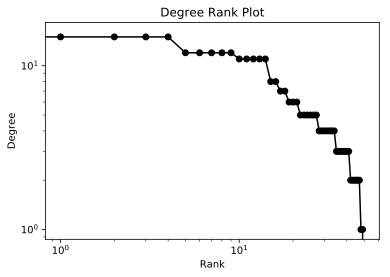

In [25]:
plt.loglog(degree_sequence, 'black', marker='o')
plt.title("Degree Rank Plot")
plt.ylabel("Degree")
plt.xlabel("Rank")
plt.show()

### <font color="green">YOUR TURN! (Question 9)</font> <a id='yt9'></a>

Question is Worth: <font color="green">1 point</font>

In the cell below, explain why it is useful to inspect the degree distribution for a network in the form of a histogram, log-log plot, or degree rank plot. Finally, what conclusions, if any, can you draw about the general structure of your ego network from the three plots just introduced? 

It's useful to inspect the degree distribution of a network through histograms, log-log plots, or degree rank plots inform unique insights at a more specialized level for which a simple visualization of the personal network may not provide. Within the degree rank plot, it can be shown that there is a gradual drop off of degree in connection among nodes eventually to the point of 0. There are a few distinct highly ranked nodes that range above the 10 degree mark and then more frequenttly levelled nodes in the mid-10s degree of connection area which is interpreted the same as the histogram. Based on the log-log plot, it is evident that the distribution is not a power law distribution for which there are an extreme set of inequalities within the degree distribution. The log log plot, if fitted, shows a curved downward parabolic line which implies that there are not a lot of extremes within the distribution. 

# Network-level Statistics  <a id='nlstats'></a>

As discussed in the assigned readings, one of the first things a researcher does when she starts analyzing a new network dataset is compute some descriptive statistics about the network. Generally, this will include a count of the number of nodes and edges in the network, the density of the network, the average degree, transitivity, and perhaps the network diameter and average shortest path length. It is possible to compute these statistics using functions from `networkx`. When reporting these statistics, we can use `numpy` to round each value to 3 decimal places. 

In [33]:
G_no_ego_1 = G_no_ego.copy()
G_no_ego_1.remove_node('Vivek S.')
print("Density is {}.".format(np.round(nx.density(G_no_ego_1), 3)))
print("Diameter is {}.".format(np.round(nx.diameter(G_no_ego_1), 3)))
print("Average shortest path length is {}.".format(np.round(nx.average_shortest_path_length(G_no_ego_1), 3)))
print("The transitivity is {}.".format(np.round(nx.transitivity(G_no_ego_1), 3)))

Density is 0.136.


NetworkXError: Found infinite path length because the graph is not connected

### <font color="green">YOUR TURN! (Question 10)</font> <a id='yt10'></a>

Question is Worth: <font color="green">1 point</font>

In the cell below, explain how to interpret the density, diameter, average shortest path statistics, and transitivity statistics. If you are unsure what these statistics mean even after doing the readings, check the `networkx` documentation or do a quick online search to clarify your understanding. 

Disclaimer: The inclusion of Vivek S within the network caused all sorts of issues within analysis since he is not connected to any other individual which means there is no connectedness of dyadic property to analyse. For the case of this question, Vivek was removed since he was a unique case which led to infinite path lengths. However, the same issue still persists even with a new graph. 

* density 
Returns the density of the graphy which means where is the graph between a measure of no edges (0) or having the maximal number of complete edges (1). This helps to show the overall connectedness of the graph and can help for invesitgating centrality from a larger viewpoint.
* diameter 
Diameter is the maximum eccentricity. This is the maximum of shortest length between a pair of vertices. Can be interpreted as the shortes distance between the farthest nodes within the graph which could help to explain time of transfer of contagion or information. In this case, the disconnected graph implies there will be an infinite path length. 
* average shortest paths 
This returns the average shortest length, which is the sum of all shortest path lengths normalized by the number of nodes. It's a measure of efficiency within the network and how informations travels. 
* transitivity 
The fraction of all possible triangles present within the graph. Triangles are ones for which two edges share the same vertex. The density of such triads implies how many clique type behaviours are present within the network. 

# Working with Large Networks <a id='ln'></a>

For roughly 100 years (give or take a couple of decades), most social network analysts have worked with *relatively* small network datasets. This is partly due to the fact that most network datasets were collected manually, such as via surveys, interviews, or systematic observation. While those methods are still in use and are *very important*, the ability to construct network datasets from life online or from the digital traces of offline life have resulted very large and complex networks that pose unique challenges. One such challenge is differentiating between signal and noise; which connections in a network are the relevant ones?

Before moving on to methods for analyzing networks, I want to briefly introduce a few methods for making large networks easier to analyze. 

Broadly speaking, there are 5 strategies you can adopt to make working with large networks easier. Perhaps the most common approach is to delete edges from a network if they do not have a high enough weight. For example, in a communication network, you might only assign an edge between two people if they have exchanged at least 3 messages in the last two weeks. Such a strategy would remove a massive number of edges from almost any network, but is not necessarily the most advisable. A related strategy is to extract the backbone of a network. Here we delete edges that are not statistically significant rather than deleting them if they fall below an arbitrary threshold. This is increasingly considered the gold standard approach and is the one I recommend. 

The third approach you can take is to extract a subset of the network that are part of a deeply embedded core. We will cover this method in Module 7, so I won't discuss it further here. The fourth approach is to aggregate the nodes in your network into larger supernodes, with the links between them representing connections across groups rather than between individuals. This can be done for groups that are defined by something outside the network, such as mutual involvement in a social movement organization, or they could be internal to the group, such as a cohesive subgroup detected using community detection methods. We will also discuss this method in Module 7, so I won't say anything further about them here. 

The final option is to use tools that are designed specifically for very large and complex graphs. For example, the `igraph` and `graph-tool` packages are extremely fast relative to `networkx`. However, the documentation for `igraph` leaves a lot to be desired and installing `graph-tool` can be surprisingly unpredictable, which doesn't make it a great choice for teaching. However, if you are interested in these options, I strongly encourage you to check them out. 

Before wrapping up, I will demonstrate the use of the edge thresholding and backboning methods. While edge thresholding is rarely the right approach, it can be in some circumstances, so it is worth knowing how to do it. Backboning is almost always the right approach, and it is relatively straightforward to do. 

In order to demonstrate these methods, we will load up a network with edge weights. In this case, we will use a character co-occurrence network from Victor Hugo's *Les Misérables*. This is not *really* a "large network," but truly large networks are too big to run on the computers we are using for this course. However, if you are interested in working with large networks and you have access to more powerful computers, you can use a network on co-starring actors that I have provided in the `data` directory. It's called `costar_network.csv`.

Below, we load the character co-occurrence network for *Les Misérables* and start experimenting with reducing the size of the network. The data is stored in a `.gml` format, which means we can read it directly into `networkx`. 

In [34]:
df = pd.read_csv('data/lesmis_edges.csv', encoding = 'utf8')
df = df[['i', 'j', 'weight']]
df.sort_values('weight', ascending=False).head()

,i,j,weight
53,26,11,31
129,55,26,21
126,55,11,19
163,62,58,17
57,27,11,17


The node information (which we are not concerned with right now) is available in a node attribute file. 

In [35]:
les_mis_nodes = pd.read_csv('data/lesmis_nodes.csv', encoding = 'utf8')
les_mis_nodes = les_mis_nodes[['id', 'label']]
les_mis_nodes.head()

# put in a dict for the visualization below 
names = dict(zip(les_mis_nodes.id,les_mis_nodes.label))

As you now know, `Pandas` and `networkx` work well together, so we can construct our network with just one line of code using the `from_pandas_edgelist()` method. 

In [36]:
G = nx.from_pandas_edgelist(df,'i','j', edge_attr = ['weight'])
G.name = 'Les Misérables'
print(nx.info(G))

Name: Les Misérables
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


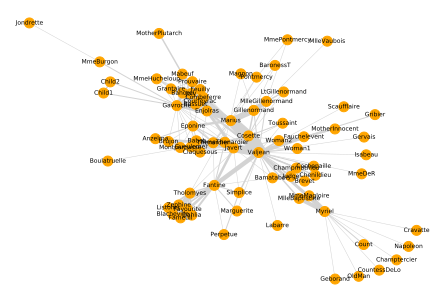

In [37]:
pos = nx.spring_layout(G, iterations=500, seed = 23)

# plot! 
weights = [G[u][v]['weight'] / 2 for u,v in G.edges()]

nx.draw(G, 
        pos = pos, 
        with_labels = True, 
        labels = names,
        node_color = 'orange', 
        font_color = 'black', 
        edge_color = 'lightgray', 
        font_size = 6, 
        width = weights,
        node_size = 100)

## Edge Thresholds  <a id='et'></a>



As previously mentioned, the first approach -- which is the right choice on occasion but you have to be careful -- is to delete edges that fall below a specific edge weight threshold. It is usually better to do this before the graph is constructed (e.g. by dropping rows from the edgelist before passing it into `networkx`, but it is possible to drop the edges after a network has been constructed. 

To do this, we need to iterate over the edges and assess whether or not each one is above or below a given threshold. For example, we might iterate over the edges in a network and check to see if each edge has a weight greater than 3. If not, we might delete it from the network. Of course, *picking a good threshold requires a bit of substantive knowledge and case-by-case reasoning.* Is 3 a heavy edge weight? Maybe, maybe not. It depends on the network, on the relationships, and obviously on how weight was measured. 

Let's eliminate edges if they do not have a weight of at least 3. We can do this with a bit of list comprehension. We will construct a list of tuples containing edges between $i$ and $j$ where the weight is **less than** our specified threshold. The result will be a list of edges we want to *remove* from the network. 

In [26]:
threshold = 3

In [27]:
remove = [(i,j) for i,j,data in G.edges(data=True) if data['weight'] < threshold]
print("{} edges will be removed. That's {}% of the edges in the network. \n{} edges will remain in the network.".format(len(remove), np.round(len(remove)/G.number_of_edges() * 100, 2), G.number_of_edges() - len(remove)))

147 edges will be removed. That's 57.87% of the edges in the network. 
107 edges will remain in the network.


Now that we know what edges to remove, we can easily delete them from the network. 

In [28]:
G.remove_edges_from(remove)
print(nx.info(G))

Name: Les Misérables
Type: Graph
Number of nodes: 77
Number of edges: 107
Average degree:   2.7792


## Extracting the Network Backbone <a id='bb'></a>

A better approach is to identify the backbone of a network using a statistical model called a disparity filter. The model is explained in detail by Seranno et al. (2009), who developed this particular approach (there are others) to extracting network backbones. 

The model is implemented in a package called `backbone_network`, which we imported at the start of this notebook.

First, let's overwrite our network object `G` with the full network rather than further modify the object with over 99% of the edges deleted! 

In [29]:
G = nx.from_pandas_edgelist(df,'i','j', edge_attr = ['weight'])
G.name = 'Les Misérables'
print(nx.info(G))

Name: Les Misérables
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [30]:
bbg = bb.get_graph_backbone(G, alpha_t = .5) 

In [31]:
print(nx.info(bbg))

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 144
Average degree:   3.7403


In [32]:
bbg.number_of_edges() / G.number_of_edges()

0.5669291338582677

As you can see, our backboning approach removed 57% of the edges from the network using an `alpha_t` value of .5. But wait... what does that value mean? To help get our heads around what is going on here, let's run our backboning function multiple times and see what it does to the number of edges in the network. 

First, we will overwrite our object `G` one final time. 

In [33]:
G = nx.from_pandas_edgelist(df,'i','j', edge_attr = ['weight'])
G.name = 'Les Misérables'
print(nx.info(G))

Name: Les Misérables
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [34]:
alphas = [.2,.3,.4,.5,.6,.7,.8]
edges = []

for a in alphas:
    tempG = G.copy()
    bone = bb.get_graph_backbone(tempG, alpha_t = a) 
    edges.append(bone.number_of_edges())

In [35]:
alphas

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [36]:
edges

[34, 64, 112, 144, 181, 216, 239]

In [37]:
ae = pd.DataFrame([alphas,edges]).T
ae.columns = ['alpha_t', 'number of edges remaining']
ae['number of edges cut'] = G.number_of_edges() - ae['number of edges remaining']
ae

,alpha_t,number of edges remaining,number of edges cut
0,0.2,34.0,220.0
1,0.3,64.0,190.0
2,0.4,112.0,142.0
3,0.5,144.0,110.0
4,0.6,181.0,73.0
5,0.7,216.0,38.0
6,0.8,239.0,15.0


As you can see from the table above that lower values for `alpha_t` eliminate more edges from the network than higher values. If you are unsure why, I encourage you to consult the article by Seranno et al. (2009). 

# Exporting Networks to Other Data Structures <a id='exp'></a>

We can export data from `networkx` to other formats, including as matrices, edgelists, or `graphml` files. For example, we can create an edgelist from our personal network using the `to_pandas_edgelist` function. By default `networkx` sets all the weights in our network to 1 because our network data is binary (0 = no tie, 1 = tie). If our data was valued (e.g. a friendship scale from 0 to 5, or a count of number of interactions within a week), then it would return the edge values as weights. 

In [38]:
am = nx.to_pandas_edgelist(G_no_ego)
am.sample(20)

,source,target,weight
246,Jen D,Grant A,1.0
79,Alix A,Jen D,1.0
130,Rob G,Janice A,1.0
231,Steph H,Tina F,1.0
239,Harry C,Rob Ev,1.0
140,Katie P,Alex d W,1.0
306,Johana W,Christine D,1.0
314,Gillian B,Paul M,1.0
256,Dom RB,Mary M,1.0
196,Sasha G,Tina F,1.0


These edgelists can easily be written to `.csv` files for storage or for sharing data with other researchers. Modify the file name below to save your own edgelist in the `data` folder. 

In [39]:
am.to_csv('data/jm_ego_data_el.csv', index = False)

<hr>

# <font color="green">Do You See Something That Could be Better?</font>

I am committed to collecting student feedback to continuously improve this course for future students. I would like to invite you to help me make those improvements. 

As you worked on this module, did you notice anything that could be improved? For example, did you find a typo in the module notebook? Did you find the explanation of a particular concept or block of code confusing? Is there something that just isn’t clicking for you? 

If you have any feedback for the content in this module, please enter it into the text block below. I will review feedback each week and make a list of things that should be changed before the next offering. 

Please know that *nothing you say here, however critical, will impact how I evaluate your work in this course*. There is no risk that I will assign a lower grade to you if you provide critical feedback. In fact, if the feedback you provide is thoughtful and constructive, I will assign up to 3% bonus marks on your final course grade. 

Thanks for your help improving the course! 

# Your Feedback Here :-) 

<hr>

# REFERENCES <a id='refs'></a>

* Borgatti, Stephen, Jay Mehra, Daniel Brass, and Giuseppe Labianca. 2009. "Network Analysis in the Social Sciences." *Science*. 323(5916): 892-5.
* Christakis, Nicholas and James Fowler. 2009. *Connected: The Surprising Power of Our Social Networks and How They Shape Our Lives.* Little, Brown Spark. 
* Prell, Christina. 2012. *Social Network Analysis: History, Theory, & Methodology.* Sage. 
* Robins, Garry. 2015. *Doing Social Network Research: Network-based Research Design for Social Scientists*. Sage. 
* Serrano, M. Ángeles, Marián Boguñá, and Alessandro Vespignanic. 2009. "[Extracting the multiscale backbone of complex weighted networks](https://www.pnas.org/content/pnas/106/16/6483.full.pdf)." *PNAS*. 106(16):6483–6488.